In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('dm.csv', na_values=[""," ","NA","N/A","n/a","na"])

In [4]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [5]:
#assume that people who spend more than average are good customers

data['target'] = data['AmountSpent'].map(lambda x: 1 if x>data['AmountSpent'].mean() else 0)

In [6]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,target
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151,1


In [7]:
data = data.drop('AmountSpent', axis=1)

In [8]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,151,1


In [9]:
data.shape

(1000, 11)

In [10]:
data['History'].value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [11]:
data['History'].isnull().sum()

303

In [12]:
data['History'] = data['History'].fillna('NewCust')

In [13]:
data['History'].value_counts()

NewCust    303
High       255
Low        230
Medium     212
Name: History, dtype: int64

In [14]:
data.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'Cust_Id', 'target'],
      dtype='object')

In [15]:
data = pd.get_dummies(data, columns=['Age','Gender','OwnHome','Married','Location','History'],prefix='class')

In [16]:
data.head()

,Salary,Children,Catalogs,Cust_Id,target,class_Middle,class_Old,class_Young,class_Female,class_Male,class_Own,class_Rent,class_Married,class_Single,class_Close,class_Far,class_High,class_Low,class_Medium,class_NewCust
0,47500,0,6,247,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,63600,0,6,127,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
2,13500,0,18,479,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
3,85600,1,18,475,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0
4,68400,0,12,151,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0


In [17]:
data.drop(['Cust_Id','class_Male','class_Own','class_Single','class_Close'], axis=1, inplace=True)

In [18]:
data.head()

,Salary,Children,Catalogs,target,class_Middle,class_Old,class_Young,class_Female,class_Rent,class_Married,class_Far,class_High,class_Low,class_Medium,class_NewCust
0,47500,0,6,0,0,1,0,1,0,0,1,1,0,0,0
1,63600,0,6,1,1,0,0,0,1,0,0,1,0,0,0
2,13500,0,18,0,0,0,1,1,1,0,0,0,1,0,0
3,85600,1,18,1,1,0,0,0,0,1,0,1,0,0,0
4,68400,0,12,1,1,0,0,1,0,0,0,1,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data.drop('target',axis=1), data['target'], test_size=0.2, random_state=42)

In [21]:
xtrain.shape

(800, 14)

In [22]:
ytrain.shape

(800,)

In [23]:
xtest.shape

(200, 14)

In [25]:
ytest.shape

(200,)

In [26]:
import statsmodels.api as sm

In [27]:
xtrain = sm.add_constant(xtrain)
xtest = sm.add_constant(xtest)

In [28]:
model1 = sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()

In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  800
Model:                            GLM   Df Residuals:                      787
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -193.34
Date:                Mon, 25 Oct 2021   Deviance:                       386.67
Time:                        11:40:37   Pearson chi2:                     479.
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.3984   2108.820     -0.004      0.997   -4141.609    4124.812
Salary         6.857e-05   1.07e-05      6.401      0.000    4.76e-05    8.96e-05
Children         -0.7417      0.177     -4.193      0.000      -1.088      -0.395
Catalogs          0.2083      0.024      8.738      0.000       0.162       0.255
class_Middle     -2.5174    702.940     -0.004      0.997   -1380.254    1375.220
class_Old        -2.5083    702.940     -0.004      0.997   -1380.245    1375.229
class_Young      -3.3727    702.940     -0.005      0.996   -1381.110    1374.364
class_Female     -0.3089      0.271     -1.141      0.254      -0.840       0.222
class_Rent       -0.2163      0.300     -0.720      0.471      -0.805       0.372
class_Married     0.1562      0.349      0.447      0.655      -0.528       0.840
class_Far         1.7830      0.346      5.148      0.000       1.104       2.462
class_High        4.2893   2811.759      0.002      0.999   -5506.658    5515.237
class_Low       -19.9998   1.05e+04     -0.002      0.998   -2.07e+04    2.06e+04
class_Medium      2.5229   2811.759      0.001      0.999   -5508.424    5513.470
class_NewCust     4.7891   2811.759      0.002      0.999   -5506.158    5515.736
=================================================================================
"""

In [30]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                  GLM                AIC:              412.6700  
Link Function:          logit              BIC:              -4874.1194
Dependent Variable:     target             Log-Likelihood:   -193.34   
Date:                   2021-10-25 11:40   LL-Null:          -542.20   
No. Observations:       800                Deviance:         386.67    
Df Model:               12                 Pearson chi2:     479.      
Df Residuals:           787                Scale:            1.0000    
Method:                 IRLS                                           
-----------------------------------------------------------------------
               Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------------
const          -8.3984  2108.8197 -0.0040 0.9968  -4141.6090  4124.8122
Salary          0.0001     0.0000  6.4011 0.0000      0.0000     0.0001
Children       -0.7417     0.1769 -4.1930 0.0000     -1.0885    -0.3950
Catalogs        0.2083     0.0238  8.7380 0.0000      0.1616     0.2550
class_Middle   -2.5174   702.9399 -0.0036 0.9971  -1380.2544  1375.2195
class_Old      -2.5083   702.9399 -0.0036 0.9972  -1380.2452  1375.2287
class_Young    -3.3727   702.9399 -0.0048 0.9962  -1381.1097  1374.3643
class_Female   -0.3089     0.2708 -1.1406 0.2541     -0.8397     0.2219
class_Rent     -0.2163     0.3003 -0.7202 0.4714     -0.8049     0.3723
class_Married   0.1562     0.3490  0.4474 0.6546     -0.5279     0.8402
class_Far       1.7830     0.3463  5.1482 0.0000      1.1042     2.4618
class_High      4.2893  2811.7595  0.0015 0.9988  -5506.6580  5515.2367
class_Low     -19.9998 10544.0980 -0.0019 0.9985 -20686.0522 20646.0526
class_Medium    2.5229  2811.7595  0.0009 0.9993  -5508.4244  5513.4702
class_NewCust   4.7891  2811.7595  0.0017 0.9986  -5506.1582  5515.7364
=======================================================================

"""

In [31]:
xtrain.drop(['class_Medium'], axis=1, inplace=True)
xtest.drop(['class_Medium'], axis=1, inplace=True)

In [32]:
model2 = sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
========================================================================
Model:                 GLM                 AIC:               412.6700  
Link Function:         logit               BIC:               -4874.1194
Dependent Variable:    target              Log-Likelihood:    -193.34   
Date:                  2021-10-25 11:48    LL-Null:           -542.20   
No. Observations:      800                 Deviance:          386.67    
Df Model:              12                  Pearson chi2:      479.      
Df Residuals:          787                 Scale:             1.0000    
Method:                IRLS                                             
------------------------------------------------------------------------
               Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------
const          -6.5062     0.6487 -10.0290 0.0000     -7.7777    -5.2347
Salary          0.0001     0.0000   6.4011 0.0000      0.0000     0.0001
Children       -0.7417     0.1769  -4.1930 0.0000     -1.0885    -0.3950
Catalogs        0.2083     0.0238   8.7380 0.0000      0.1616     0.2550
class_Middle   -1.8867     0.3285  -5.7442 0.0000     -2.5305    -1.2430
class_Old      -1.8775     0.3080  -6.0967 0.0000     -2.4811    -1.2740
class_Young    -2.7420     0.3639  -7.5350 0.0000     -3.4552    -2.0287
class_Female   -0.3089     0.2708  -1.1406 0.2541     -0.8397     0.2219
class_Rent     -0.2163     0.3003  -0.7202 0.4714     -0.8049     0.3723
class_Married   0.1562     0.3490   0.4474 0.6546     -0.5279     0.8402
class_Far       1.7830     0.3463   5.1482 0.0000      1.1042     2.4618
class_High      1.7664     0.4073   4.3368 0.0000      0.9681     2.5647
class_Low     -22.5227 13355.8577  -0.0017 0.9987 -26199.5228 26154.4774
class_NewCust   2.2662     0.3398   6.6690 0.0000      1.6002     2.9322
========================================================================

"""

In [33]:
xtrain.drop(['class_Low'], axis=1, inplace=True)
xtest.drop(['class_Low'], axis=1, inplace=True)

In [34]:
model3 = sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            421.9369  
Link Function:      logit            BIC:            -4869.5371
Dependent Variable: target           Log-Likelihood: -198.97   
Date:               2021-10-25 11:49 LL-Null:        -542.20   
No. Observations:   800              Deviance:       397.94    
Df Model:           11               Pearson chi2:   537.      
Df Residuals:       788              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -6.6672   0.6258 -10.6541 0.0000 -7.8937 -5.4407
Salary          0.0001   0.0000   6.5279 0.0000  0.0000  0.0001
Children       -0.8594   0.1728  -4.9738 0.0000 -1.1980 -0.5207
Catalogs        0.2105   0.0235   8.9641 0.0000  0.1644  0.2565
class_Middle   -1.8586   0.3241  -5.7354 0.0000 -2.4938 -1.2235
class_Old      -1.9450   0.3037  -6.4045 0.0000 -2.5403 -1.3498
class_Young    -2.8635   0.3569  -8.0225 0.0000 -3.5631 -2.1639
class_Female   -0.2970   0.2703  -1.0986 0.2719 -0.8269  0.2329
class_Rent     -0.2146   0.2992  -0.7172 0.4733 -0.8010  0.3719
class_Married   0.2344   0.3496   0.6703 0.5027 -0.4509  0.9197
class_Far       1.8908   0.3455   5.4720 0.0000  1.2135  2.5680
class_High      1.9076   0.4090   4.6644 0.0000  1.1060  2.7092
class_NewCust   2.4945   0.3321   7.5117 0.0000  1.8436  3.1454
===============================================================

"""

In [35]:
xtrain.drop(['class_Married'], axis=1, inplace=True)
xtest.drop(['class_Married'], axis=1, inplace=True)

model4 = sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            420.3846  
Link Function:      logit            BIC:            -4875.7740
Dependent Variable: target           Log-Likelihood: -199.19   
Date:               2021-10-25 11:51 LL-Null:        -542.20   
No. Observations:   800              Deviance:       398.38    
Df Model:           10               Pearson chi2:   557.      
Df Residuals:       789              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -6.7534   0.6152 -10.9777 0.0000 -7.9592 -5.5476
Salary          0.0001   0.0000   8.2763 0.0000  0.0001  0.0001
Children       -0.8496   0.1718  -4.9464 0.0000 -1.1863 -0.5130
Catalogs        0.2112   0.0234   9.0080 0.0000  0.1652  0.2572
class_Middle   -1.9495   0.2959  -6.5886 0.0000 -2.5295 -1.3696
class_Old      -1.9481   0.3034  -6.4198 0.0000 -2.5428 -1.3533
class_Young    -2.8558   0.3560  -8.0217 0.0000 -3.5535 -2.1580
class_Female   -0.2718   0.2677  -1.0154 0.3099 -0.7964  0.2528
class_Rent     -0.1955   0.2973  -0.6574 0.5109 -0.7782  0.3873
class_Far       1.8966   0.3453   5.4931 0.0000  1.2199  2.5733
class_High      1.8963   0.4084   4.6433 0.0000  1.0958  2.6967
class_NewCust   2.4962   0.3322   7.5135 0.0000  1.8451  3.1474
===============================================================

"""

In [36]:
xtrain.drop(['class_Rent'], axis=1, inplace=True)
xtest.drop(['class_Rent'], axis=1, inplace=True)

model5 = sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()
model5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            418.8162  
Link Function:      logit            BIC:            -4882.0270
Dependent Variable: target           Log-Likelihood: -199.41   
Date:               2021-10-25 11:51 LL-Null:        -542.20   
No. Observations:   800              Deviance:       398.82    
Df Model:           9                Pearson chi2:   553.      
Df Residuals:       790              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -6.8722   0.5913 -11.6228 0.0000 -8.0310 -5.7133
Salary          0.0001   0.0000   8.5453 0.0000  0.0001  0.0001
Children       -0.8446   0.1714  -4.9269 0.0000 -1.1805 -0.5086
Catalogs        0.2110   0.0234   9.0175 0.0000  0.1652  0.2569
class_Middle   -1.9868   0.2908  -6.8328 0.0000 -2.5568 -1.4169
class_Old      -1.9382   0.3028  -6.4008 0.0000 -2.5317 -1.3447
class_Young    -2.9471   0.3298  -8.9349 0.0000 -3.5936 -2.3006
class_Female   -0.2637   0.2672  -0.9870 0.3236 -0.7875  0.2600
class_Far       1.8742   0.3435   5.4570 0.0000  1.2011  2.5474
class_High      1.9055   0.4073   4.6783 0.0000  1.1072  2.7038
class_NewCust   2.5085   0.3320   7.5558 0.0000  1.8578  3.1593
===============================================================

"""

In [37]:
xtrain.drop(['class_Female'], axis=1, inplace=True)
xtest.drop(['class_Female'], axis=1, inplace=True)

model6 = sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()
model6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            417.7897  
Link Function:      logit            BIC:            -4887.7382
Dependent Variable: target           Log-Likelihood: -199.89   
Date:               2021-10-25 11:53 LL-Null:        -542.20   
No. Observations:   800              Deviance:       399.79    
Df Model:           8                Pearson chi2:   581.      
Df Residuals:       791              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -6.9945   0.5812 -12.0345 0.0000 -8.1336 -5.8554
Salary          0.0001   0.0000   8.7903 0.0000  0.0001  0.0001
Children       -0.8673   0.1702  -5.0946 0.0000 -1.2009 -0.5336
Catalogs        0.2103   0.0233   9.0342 0.0000  0.1646  0.2559
class_Middle   -2.0123   0.2894  -6.9532 0.0000 -2.5795 -1.4451
class_Old      -2.0081   0.2949  -6.8097 0.0000 -2.5861 -1.4302
class_Young    -2.9741   0.3311  -8.9832 0.0000 -3.6230 -2.3252
class_Far       1.8871   0.3441   5.4850 0.0000  1.2128  2.5615
class_High      1.8771   0.4057   4.6272 0.0000  1.0820  2.6722
class_NewCust   2.4871   0.3302   7.5313 0.0000  1.8399  3.1344
===============================================================

"""

In [38]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
predictions = model6.predict(xtest)

In [40]:
predictions.head()

521    0.002653
737    0.041345
740    0.019799
660    0.000226
411    0.253016
dtype: float64

In [41]:
threshold = 0.5
predicted_classes = np.where(predictions>threshold, 1, 0)

In [42]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0])

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(ytest, predicted_classes)

0.89

In [45]:
confmat = confusion_matrix(ytest, predicted_classes)
confmat

array([[119,  12],
       [ 10,  59]], dtype=int64)

In [46]:
cf = pd.DataFrame(confmat, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
cf

,Predicted 0,Predicted 1
Actual 0,119,12
Actual 1,10,59


In [48]:
print(classification_report(ytest, predicted_classes))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       131
           1       0.83      0.86      0.84        69

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

In [50]:
auc = roc_auc_score(ytest, predictions)
auc

0.9587343732713796

In [51]:
fpr, tpr, threshold = roc_curve(ytest, predictions)

In [52]:
fpr

array([0.        , 0.        , 0.        , 0.00763359, 0.00763359,
       0.02290076, 0.02290076, 0.03053435, 0.03053435, 0.03816794,
       0.03816794, 0.05343511, 0.05343511, 0.0610687 , 0.0610687 ,
       0.07633588, 0.07633588, 0.08396947, 0.08396947, 0.09160305,
       0.09160305, 0.11450382, 0.11450382, 0.15267176, 0.15267176,
       0.16030534, 0.16030534, 0.18320611, 0.18320611, 0.22900763,
       0.22900763, 0.28244275, 0.28244275, 0.36641221, 0.36641221,
       0.47328244, 0.47328244, 1.        ])

In [53]:
tpr

array([0.        , 0.01449275, 0.50724638, 0.50724638, 0.63768116,
       0.63768116, 0.69565217, 0.69565217, 0.76811594, 0.76811594,
       0.7826087 , 0.7826087 , 0.8115942 , 0.8115942 , 0.82608696,
       0.82608696, 0.84057971, 0.84057971, 0.85507246, 0.85507246,
       0.86956522, 0.86956522, 0.89855072, 0.89855072, 0.91304348,
       0.91304348, 0.92753623, 0.92753623, 0.94202899, 0.94202899,
       0.95652174, 0.95652174, 0.97101449, 0.97101449, 0.98550725,
       0.98550725, 1.        , 1.        ])

In [54]:
threshold

array([1.99991424e+00, 9.99914243e-01, 9.44236257e-01, 9.41703826e-01,
       8.94482933e-01, 8.69065757e-01, 8.45099029e-01, 8.36840135e-01,
       7.96489826e-01, 7.96000602e-01, 7.80284298e-01, 7.10934301e-01,
       6.85995097e-01, 6.81387539e-01, 6.60705657e-01, 6.06387742e-01,
       5.98318377e-01, 5.79919915e-01, 5.26267796e-01, 5.05470757e-01,
       4.77372292e-01, 4.60893690e-01, 4.43023265e-01, 3.77449599e-01,
       3.66703246e-01, 3.29050701e-01, 3.10105675e-01, 2.74759386e-01,
       2.61493160e-01, 2.09374641e-01, 2.09177618e-01, 1.62016411e-01,
       1.61027208e-01, 8.29807984e-02, 8.12487592e-02, 4.21481984e-02,
       4.15875564e-02, 1.11178269e-04])

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

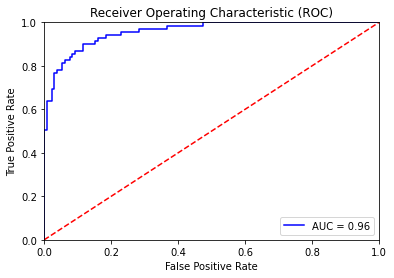

In [56]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

In [58]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
optimal_threshold

0.44302326482928883

In [59]:
predicted_classes = np.where(predictions>optimal_threshold, 1, 0)

In [60]:
accuracy_score(ytest, predicted_classes)

0.885

In [61]:
confmat = confusion_matrix(ytest, predicted_classes)
cf = pd.DataFrame(confmat, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
cf

,Predicted 0,Predicted 1
Actual 0,116,15
Actual 1,8,61


In [62]:
print(classification_report(ytest, predicted_classes))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       131
           1       0.80      0.88      0.84        69

    accuracy                           0.89       200
   macro avg       0.87      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



In [64]:
from sklearn.linear_model import LogisticRegression

In [80]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop('target',axis=1), data['target'], test_size=0.2, random_state=42)

In [81]:
xtrain.drop(['class_Medium','class_Low','class_Married','class_Rent','class_Female'], axis=1, inplace=True)
xtest.drop(['class_Medium','class_Low','class_Married','class_Rent','class_Female'], axis=1, inplace=True)

In [82]:
logreg_model = LogisticRegression().fit(xtrain, ytrain)

In [83]:
logreg_pred_classes = logreg_model.predict(xtest)

In [84]:
logreg_pred_classes

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [85]:
logreg_pred = logreg_model.predict_proba(xtest)

In [77]:
logreg_pred

array([[0.48716999, 0.51283001],
       [0.72489328, 0.27510672],
       [0.67564502, 0.32435498],
       [0.63000568, 0.36999432],
       [0.41860392, 0.58139608],
       [0.75301255, 0.24698745],
       [0.69672416, 0.30327584],
       [0.58110614, 0.41889386],
       [0.44892124, 0.55107876],
       [0.5116837 , 0.4883163 ],
       [0.34114445, 0.65885555],
       [0.43690141, 0.56309859],
       [0.365489  , 0.634511  ],
       [0.51354331, 0.48645669],
       [0.53421074, 0.46578926],
       [0.42799686, 0.57200314],
       [0.52559365, 0.47440635],
       [0.27499913, 0.72500087],
       [0.23735465, 0.76264535],
       [0.48907598, 0.51092402],
       [0.37831328, 0.62168672],
       [0.33871007, 0.66128993],
       [0.54454297, 0.45545703],
       [0.67141456, 0.32858544],
       [0.58862046, 0.41137954],
       [0.54192218, 0.45807782],
       [0.57339099, 0.42660901],
       [0.5615932 , 0.4384068 ],
       [0.53535983, 0.46464017],
       [0.56806131, 0.43193869],
       [0.

In [86]:
accuracy_score(ytest, logreg_pred_classes)

0.775

In [87]:
## Different dataset

In [90]:
review = pd.read_table('movie_reviews.tsv', sep='\t')

In [91]:
review.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [92]:
review.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [93]:
review.drop(['id'], axis=1, inplace=True)

In [94]:
review.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [98]:
review['sentiment'].describe()

count    25000.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: sentiment, dtype: float64

In [ ]:
#demo of creating text features

In [99]:
demo_text = ['This is sentence one',
            'This is sentence two',
            'This is a very very long sentence three']
demo_text

['This is sentence one',
 'This is sentence two',
 'This is a very very long sentence three']

In [100]:
import sklearn.feature_extraction.text as text

In [101]:
cv = text.CountVectorizer()
count_matrix = cv.fit_transform(demo_text)
count_matrix

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [102]:
cv.get_feature_names()

['is', 'long', 'one', 'sentence', 'this', 'three', 'two', 'very']

In [103]:
count_matrix.toarray()

array([[1, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 2]], dtype=int64)

In [104]:
pd.DataFrame(count_matrix.toarray(), columns=cv.get_feature_names())

,is,long,one,sentence,this,three,two,very
0,1,0,1,1,1,0,0,0
1,1,0,0,1,1,0,1,0
2,1,1,0,1,1,1,0,2


In [106]:
review.shape

(25000, 2)

In [153]:
cv = text.CountVectorizer(review['review'].tolist(), max_features=5000)
X = cv.fit_transform(review['review'])
X.shape

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(25000, 5000)

In [154]:
y = review['sentiment']

In [108]:
X

<25000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 2956225 stored elements in Compressed Sparse Row format>

In [164]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [109]:
pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

,00,000,10,100,11,12,13,13th,14,15,...,young,younger,your,yourself,youth,zero,zizek,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
cv.get_feature_names()

['00',
 '000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '13th',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1930',
 '1930s',
 '1933',
 '1940',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1968',
 '1970',
 '1970s',
 '1972',
 '1973',
 '1980',
 '1980s',
 '1983',
 '1984',
 '1987',
 '1990',
 '1996',
 '1997',
 '1999',
 '1st',
 '20',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '20th',
 '24',
 '25',
 '2nd',
 '30',
 '30s',
 '35',
 '3d',
 '3rd',
 '40',
 '45',
 '50',
 '50s',
 '60',
 '60s',
 '70',
 '70s',
 '80',
 '80s',
 '90',
 '90s',
 '99',
 'abandoned',
 'abc',
 'abilities',
 'ability',
 'able',
 'about',
 'above',
 'abraham',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absurd',
 'abuse',
 'abusive',
 'abysmal',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accident',
 'accidentally',
 'accompanied',
 'accomplished',
 'according',
 'account',
 'accurate',
 'accused',
 'achieve',
 'achieved',
 'achievement',
 'acid',
 'across',
 'act'

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [117]:
clf = LogisticRegression()

In [118]:
mod = clf.fit(X_train,y_train)

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
mod.predict_proba(X_test)

array([[1.45314957e-01, 8.54685043e-01],
       [9.66634127e-02, 9.03336587e-01],
       [9.99887017e-01, 1.12982861e-04],
       ...,
       [2.96945447e-04, 9.99703055e-01],
       [3.03349764e-02, 9.69665024e-01],
       [5.58485624e-03, 9.94415144e-01]])

In [120]:
mod.classes_

array([0, 1], dtype=int64)

In [124]:
from sklearn.model_selection import GridSearchCV

In [131]:
np.random.seed(300)
mod = GridSearchCV(clf, param_grid={'penalty':['l2'],
                                  'C':np.random.uniform(0,120,2)})
mod.fit(X_train,y_train)

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([54.13470824, 26.52268101]),
                         'penalty': ['l2']})

In [132]:
mod.best_estimator_

LogisticRegression(C=26.522681005625447)

In [133]:
mod.best_score_

0.85885

In [134]:
mod.predict_proba(X_test)

array([[2.74501148e-02, 9.72549885e-01],
       [6.29009080e-02, 9.37099092e-01],
       [9.99989018e-01, 1.09820923e-05],
       ...,
       [7.79798787e-06, 9.99992202e-01],
       [1.12178385e-02, 9.88782161e-01],
       [3.33860468e-03, 9.96661395e-01]])

In [137]:
auc = roc_auc_score(y_test, mod.predict_proba(X_test)[:,1])

In [138]:
auc

0.9395838614198551

In [136]:
fpr, tpr, threshold = roc_curve(y_test, mod.predict_proba(X_test)[:,1])

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

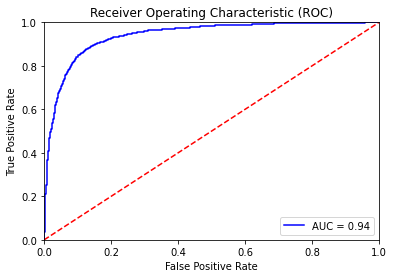

In [139]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

In [140]:
mod.predict(X_test)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [142]:
confmat=confusion_matrix(y_test, mod.predict(X_test))

In [143]:
pd.DataFrame(confmat, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,2164,304
Actual 1,326,2206


In [145]:
print(classification_report(y_test, mod.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2468
           1       0.88      0.87      0.88      2532

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [162]:
demo_text = ['for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid 80s with a 12-part series called the watchmen .   ',
            "in other words , don't dismiss this film because of its source .",
            'Must watch',
            'if you can get past the whole comic book thing , you might find another stumbling block in from hells directors , albert and allen hughes',
            "'it's a quick , straight shot to the movie's end'",
            'negative',
            "'after watching _a_night_at_the_roxbury_ , you'll be left with exactly the same'"]

In [163]:
mod.predict(cv.transform(demo_text))

array([1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [165]:
pixel_values = pd.read_csv('mnist_x.csv')
image_labels = pd.read_csv('mnist_y.csv', header=None)

In [171]:
pixel_values.shape

(1797, 64)

In [166]:
pixel_values.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [167]:
image_labels.head()

,0
0,0
1,1
2,2
3,3
4,4


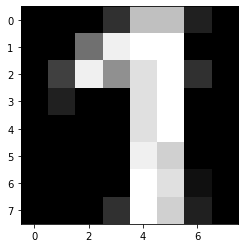

In [172]:
plt.imshow(np.array(pixel_values.iloc[1500]).reshape(8,8), cmap='gray')

In [173]:
pixel_values = pixel_values/255.0

In [174]:
X = pixel_values
y = image_labels[0]

In [175]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=200)

In [176]:
clf = LogisticRegression(multi_class='ovr', penalty='l2', solver='lbfgs')

In [177]:
np.random.seed(200)
mod = GridSearchCV(clf, param_grid={'C':np.random.uniform(0.01,10,10)})
mod.fit(Xtrain,ytrain)

GridSearchCV(estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': array([9.47684625, 2.27320874, 5.94825724, 4.28880376, 7.64376546,
       0.03857731, 3.58066258, 9.09785191, 4.56624904, 9.81820906])})

In [178]:
mod.best_params_

{'C': 9.818209064491702}

In [180]:
mod.best_score_

0.9241627951993806

In [181]:
mod.score(Xtest, ytest)

0.9416666666666667

In [182]:
Xtest.iloc[0].values.reshape(1,-1)

array([[0.        , 0.00784314, 0.04705882, 0.05098039, 0.0627451 ,
        0.05882353, 0.00392157, 0.        , 0.        , 0.03137255,
        0.0627451 , 0.05490196, 0.04313725, 0.02745098, 0.        ,
        0.        , 0.        , 0.03137255, 0.0627451 , 0.02745098,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02745098, 0.0627451 , 0.0627451 , 0.04313725, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.02352941, 0.05882353, 0.03529412, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03529412,
        0.05882353, 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.02745098, 0.0627451 , 0.04313725, 0.        ,
        0.        , 0.        , 0.00392157, 0.0627451 , 0.0627451 ,
        0.05098039, 0.00392157, 0.        , 0.        ]])

In [183]:
mod.predict_proba(Xtest.iloc[0].values.reshape(1,-1))

array([[0.01435224, 0.03089049, 0.01674947, 0.11443426, 0.01403317,
        0.69181214, 0.00932715, 0.01196723, 0.05155476, 0.04487909]])

In [184]:
np.argmax(mod.predict_proba(Xtest.iloc[0].values.reshape(1,-1)))

5

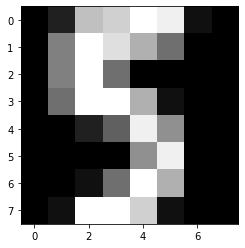

In [185]:
plt.imshow(np.array(Xtest.iloc[0]).reshape(8,8), cmap='gray')

In [186]:
clf = LogisticRegression(multi_class='multinomial', penalty='l2', solver='lbfgs')
np.random.seed(200)
mod = GridSearchCV(clf, param_grid={'C':np.random.uniform(0.01,10,10)})
mod.fit(Xtrain,ytrain)

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': array([9.47684625, 2.27320874, 5.94825724, 4.28880376, 7.64376546,
       0.03857731, 3.58066258, 9.09785191, 4.56624904, 9.81820906])})

In [187]:
mod.best_params_

{'C': 9.818209064491702}

In [188]:
mod.best_score_

0.9290360046457609

In [189]:
mod.score(Xtest, ytest)

0.9472222222222222

In [195]:
np.argmax(mod.predict_proba(Xtest.iloc[50].values.reshape(1,-1)))

6

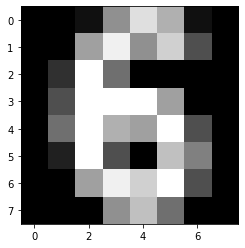

In [196]:
plt.imshow(np.array(Xtest.iloc[50]).reshape(8,8), cmap='gray')